In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression

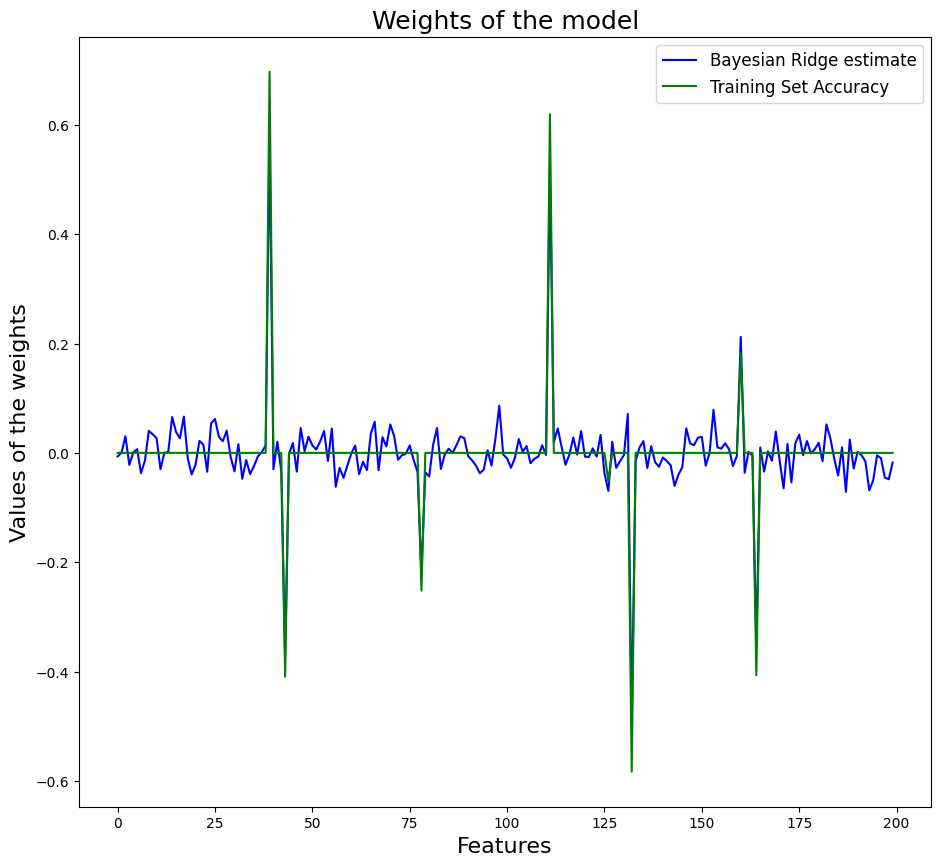

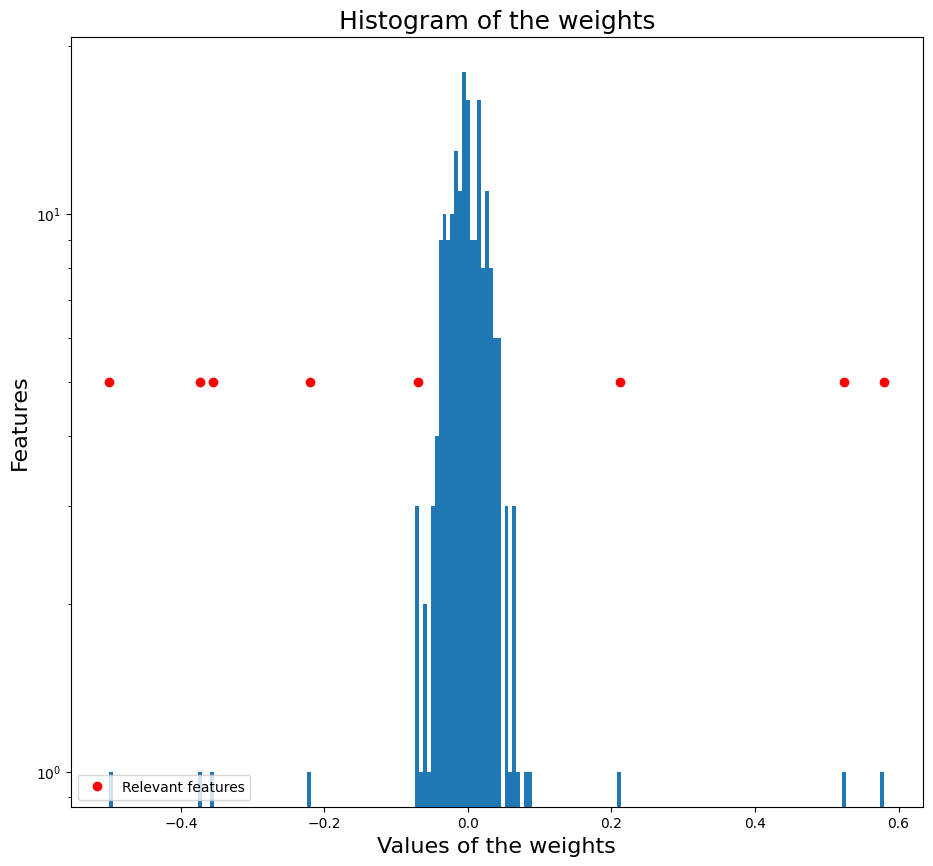

In [5]:
np.random.seed(0)
n_samples, n_features = 200, 200

X = np.random.randn(n_samples, n_features) # Gaussian data
#Create weights with a precision of 4
theta = 4.
w = np.zeros(n_features)

#only keep 8 weights of interest
relevant_features = np.random.randint(0, n_features,8)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1./np.sqrt(theta))
    
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
y = np.dot(X, w) + noise

#fit the Bayesian Ridge Regression
clf = BayesianRidge(compute_score=True)
clf.fit(X,y)

# Plot weights and estimated and histogram of weights
plt.figure(figsize=(11,10))
plt.title("Weights of the model", fontsize=18)
plt.plot(clf.coef_, 'b-', label="Bayesian Ridge estimate")
plt.plot(w, 'g-', label="Training Set Accuracy")
plt.xlabel("Features", fontsize=16)
plt.ylabel("Values of the weights", fontsize=16)
plt.legend(loc="best", prop=dict(size=12))
plt.figure(figsize=(11,10))
plt.title("Histogram of the weights", fontsize=18)
plt.hist(clf.coef_, bins=n_features, log=True)
plt.plot(clf.coef_[relevant_features], 5*np.ones(len(relevant_features)), 'ro', label="Relevant features")
plt.ylabel("Features", fontsize=16)
plt.xlabel("Values of the weights", fontsize=16)
plt.legend(loc="lower left")
plt.show()






